In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [48]:
df =pd.read_csv("SalaryData_Train.csv")
df.head(10)

age          workclass   education  educationno           maritalstatus  \
0   39          State-gov   Bachelors           13           Never-married   
1   50   Self-emp-not-inc   Bachelors           13      Married-civ-spouse   
2   38            Private     HS-grad            9                Divorced   
3   53            Private        11th            7      Married-civ-spouse   
4   28            Private   Bachelors           13      Married-civ-spouse   
5   37            Private     Masters           14      Married-civ-spouse   
6   49            Private         9th            5   Married-spouse-absent   
7   52   Self-emp-not-inc     HS-grad            9      Married-civ-spouse   
8   31            Private     Masters           14           Never-married   
9   42            Private   Bachelors           13      Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   
5     Exec-managerial            Wife   White   Female            0   
6       Other-service   Not-in-family   Black   Female            0   
7     Exec-managerial         Husband   White     Male            0   
8      Prof-specialty   Not-in-family   White   Female        14084   
9     Exec-managerial         Husband   White     Male         5178   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K  
5            0            40   United-States   <=50K  
6            0            16         Jamaica   <=50K  
7            0            45   United-States    >50K  
8            0            50   United-States    >50K  
9            0            40   United-States    >50K

In [49]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [50]:
df.shape

(30161, 14)

In [51]:
df.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [55]:
df["Salary"].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [56]:
df["sex"].value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

In [57]:
df["native"].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [58]:
df["workclass"].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [59]:
df["occupation"].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [60]:
df["education"].value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [61]:
df=df.drop(["educationno"],axis=1)


In [62]:
df.head()

age          workclass   education        maritalstatus  \
0   39          State-gov   Bachelors        Never-married   
1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2   38            Private     HS-grad             Divorced   
3   53            Private        11th   Married-civ-spouse   
4   28            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

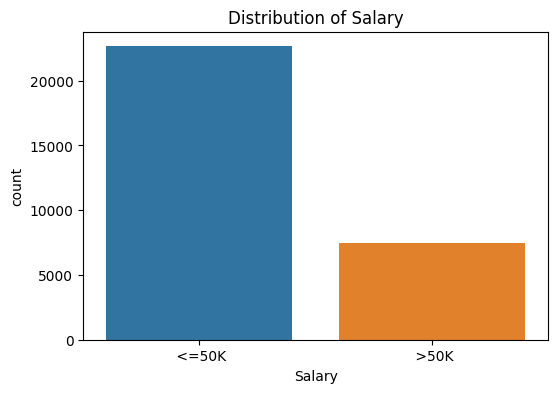

In [63]:
# Visualize the distribution of 'Salary'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Salary')
plt.title("Distribution of Salary")
plt.show()

In [64]:
# Convert categorical features to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native','Salary']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

age  workclass  education  maritalstatus  occupation  relationship  race  \
0   39          5          9              4           0             1     4   
1   50          4          9              2           3             0     4   
2   38          2         11              0           5             1     4   
3   53          2          1              2           5             0     2   
4   28          2          9              2           9             5     2   

   sex  capitalgain  capitalloss  hoursperweek  native  Salary  
0    1         2174            0            40      37       0  
1    1            0            0            13      37       0  
2    1            0            0            40      37       0  
3    1            0            0            40      37       0  
4    0            0            0            40       4       0

<Axes: xlabel='Salary', ylabel='age'>

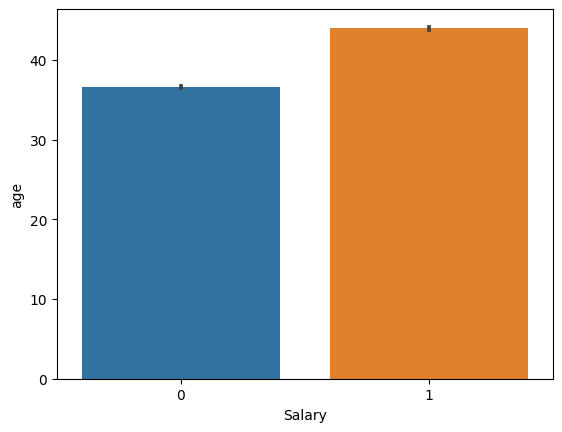

In [65]:
sns.barplot(x="Salary",y="age",data=df)

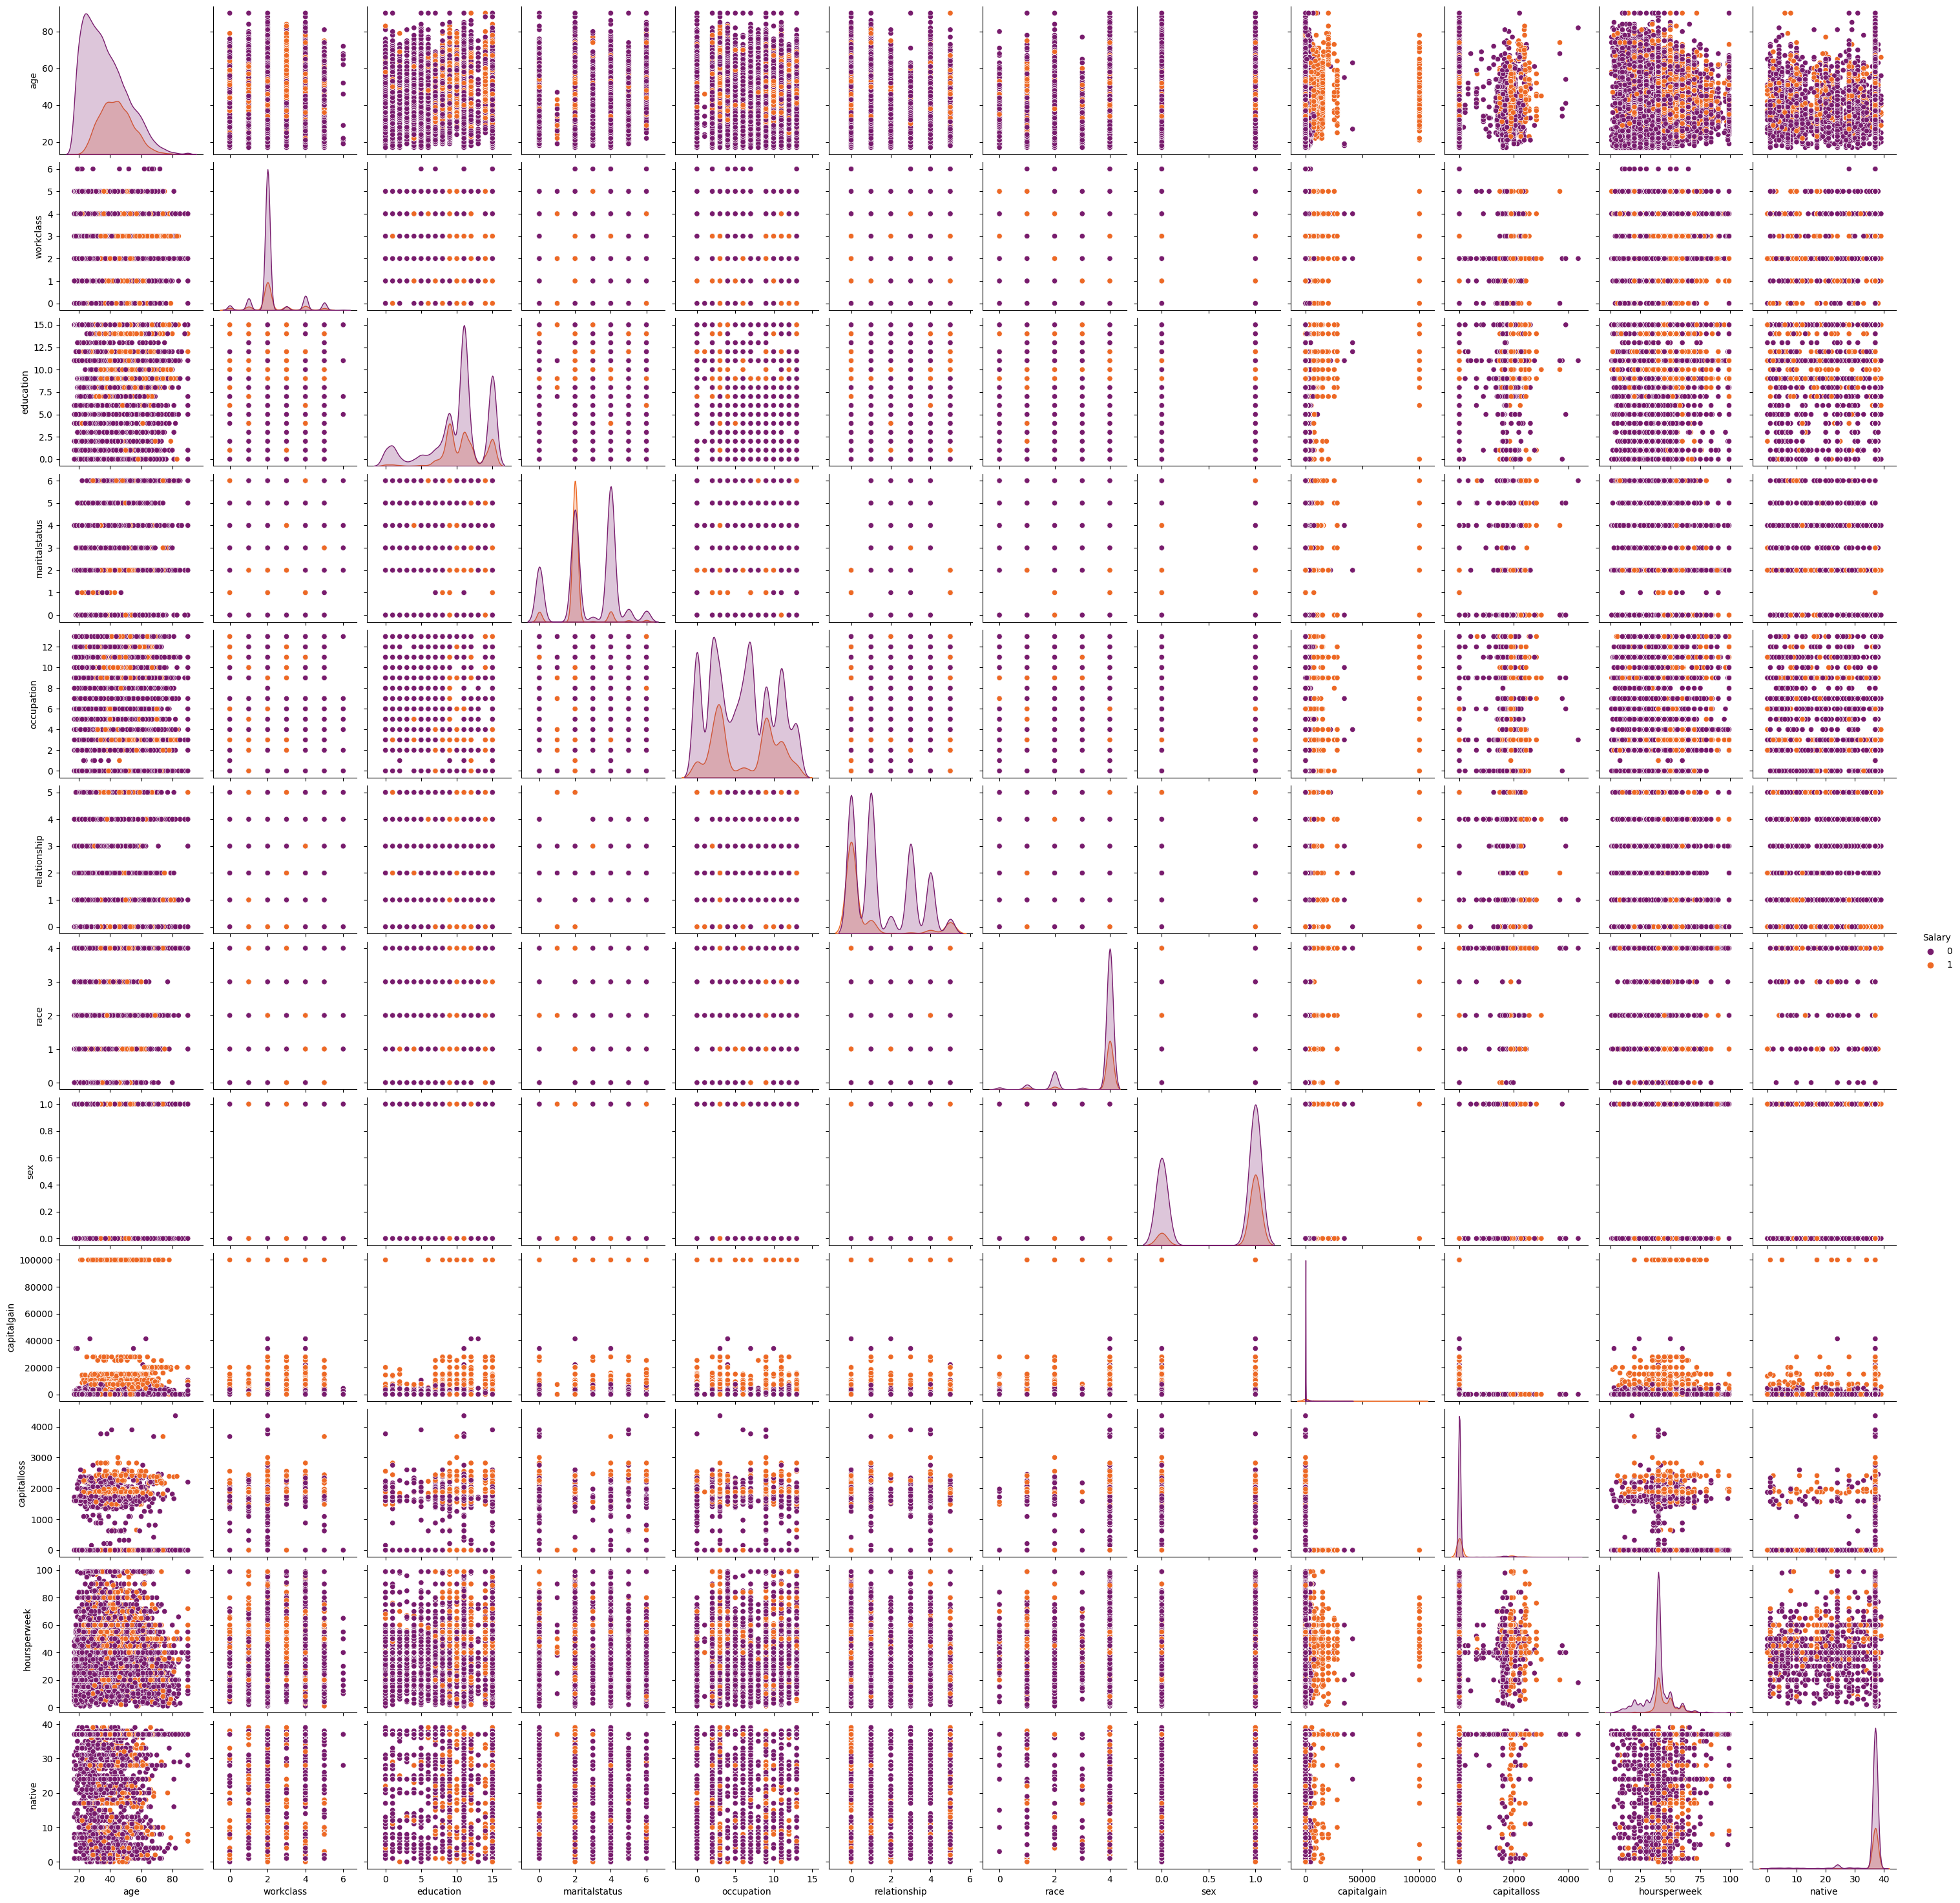

In [66]:
sns.pairplot(df,hue="Salary",palette="inferno")

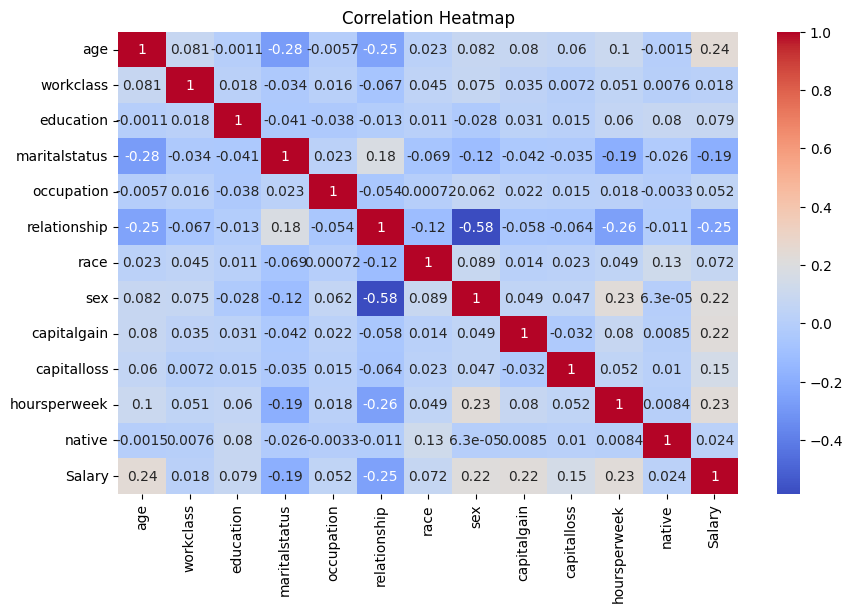

In [68]:
# Visualize the correlation between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

prepare the test data

In [45]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [47]:
df1=pd.read_csv("SalaryData_Test.csv")
df1.head(10)

age          workclass      education  educationno        maritalstatus  \
0   25            Private           11th            7        Never-married   
1   38            Private        HS-grad            9   Married-civ-spouse   
2   28          Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44            Private   Some-college           10   Married-civ-spouse   
4   34            Private           10th            6        Never-married   
5   63   Self-emp-not-inc    Prof-school           15   Married-civ-spouse   
6   24            Private   Some-college           10        Never-married   
7   55            Private        7th-8th            4   Married-civ-spouse   
8   65            Private        HS-grad            9   Married-civ-spouse   
9   36        Federal-gov      Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black     Male            0   
1     Farming-fishing         Husband   White     Male            0   
2     Protective-serv         Husband   White     Male            0   
3   Machine-op-inspct         Husband   Black     Male         7688   
4       Other-service   Not-in-family   White     Male            0   
5      Prof-specialty         Husband   White     Male         3103   
6       Other-service       Unmarried   White   Female            0   
7        Craft-repair         Husband   White     Male            0   
8   Machine-op-inspct         Husband   White     Male         6418   
9        Adm-clerical         Husband   White     Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K  
5            0            32   United-States    >50K  
6            0            40   United-States   <=50K  
7            0            10   United-States   <=50K  
8            0            40   United-States    >50K  
9            0            40   United-States   <=50K

In [53]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [67]:
df1=df1.drop(["educationno"],axis=1)

In [81]:
# Convert categorical features to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native','Salary']
for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])
df1.head()

age  workclass  education  maritalstatus  occupation  relationship  race  \
0   25          2          1              4           6             3     2   
1   38          2         11              2           4             0     4   
2   28          1          7              2          10             0     4   
3   44          2         15              2           6             0     2   
4   34          2          0              4           7             1     4   

   sex  capitalgain  capitalloss  hoursperweek  native  Salary  
0    1            0            0            40      37       0  
1    1            0            0            50      37       0  
2    1            0            0            40      37       1  
3    1         7688            0            40      37       1  
4    1            0            0            30      37       0

In [82]:
# Select features and target variable
X_train = df.drop('Salary', axis=1)
y_train = df['Salary']
X_test  = df1.drop('Salary', axis=1)
y_test = df1['Salary']

In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [84]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)


GaussianNB()

In [85]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
y_pred=gb.predict(X_test)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.31      0.42      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.63      0.65     15060
weighted avg       0.77      0.79      0.76     15060



In [87]:
print(confusion_matrix(y_test,y_pred))

[[10807   553]
 [ 2565  1135]]


In [88]:
print(accuracy_score(y_test,y_pred)*100)

79.29614873837981
